# Sampling and error
* A random sample tends to exhibit the same properties as the population from which it is drawn. (The sample must be random.)
* A random sample of 50 college students were asked how many exclusive relationships they have been in so far. The approximate 95% confidence interval is given by: (2.7, 3.7).  Which of the following is the correct interpretation of this confidence interval? We are 95% confident that college students on average have been in between 2.7 and 3.7 exclusive relationships.

* In inferential statistics, we analyze a randomly chosen sample of examples to make inferences about a population of examples. The goal is to draw conclusions about the population based on information gathered from the sample. By using statistical techniques to analyze the sample data, we can estimate the values of population parameters and make predictions about the behavior of the population.

* It is important to ensure that the sample is truly random and representative of the population of interest in order for the inferences to be valid.
* 

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [4]:
def makeHist(data, title, xlabel, ylabel, bins = 20):
    plt.hist(data, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def getHighs():
    with open('temperatures.csv', 'r') as file:
        population = [] #referes to all datapoints extracted from data set. will be all high temp
        for elem in file:
            try:
                tempC = float(elem.split(',')[1]) #extracts the daily high temp.
                population.append(tempC)
            except:
                continue #won't crash program if it cant convert
        return population


In [5]:
def getMeansAndSds(population, sample, verbose = False, plots = 3):
    popMean = np.mean(population)
    sampleMean = np.mean(sample)
    if verbose:
        if (plots ==3 or plots ==1): #population sample set
            makeHist(population, 'Daily Hight 1961-2015, Population\n' +\
                '(mean = ' + str(round(popMean, 2)) + ')',
                'Degrees C°', 'Number Days')
        #plt.figure()
        if (plots == 3 or plots == 2): #sample data set
            makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C°', 'Number Days') #alt0176 °
        plt.show()
        print('Pop mean =', popMean)#print statements to show the data under graph
        print('Standard deviation of population =',
              np.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =', np.std(sample)) #np.std ==standard deviation
    return popMean, sampleMean, np.std(population), np.std(sample)

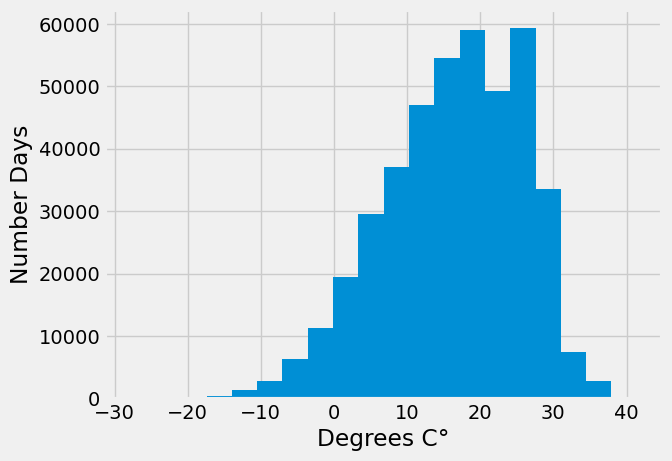

Pop mean = 16.298769461986303
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986303, 17.0685, 9.437558544803602, 10.390314372048614)

In [6]:
random.seed(0)
population = getHighs()
sample = random.sample(population, 100) #random 100 samples from population
getMeansAndSds(population, sample, True, 1) #True and 1; generate text output and visualization

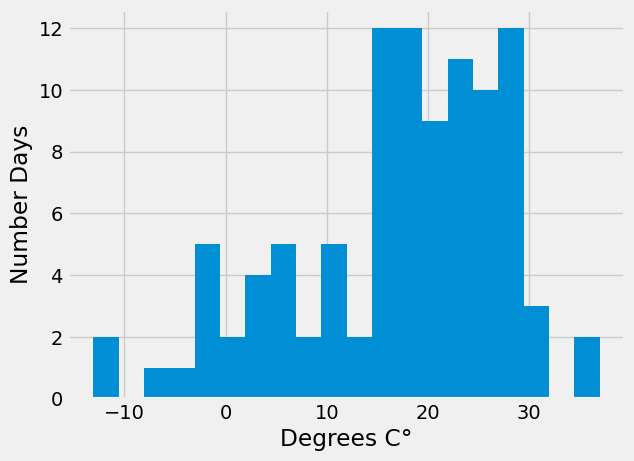

Pop mean = 16.298769461986303
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986303, 17.0685, 9.437558544803602, 10.390314372048614)

In [12]:
getMeansAndSds(population, sample, True, 2) # 2 indicates histo for sample instead of pop
#if false, no hist just the 3 bottom summary

Try It 1000 Times
We'd like to check if the above result is just a happy result. To conduct a checking, we could

Run the above code and get the histogram

What's the 95% confidence interval?

16.28 + -1.96*0.94
14.5 - 18.1
Includes population mean, but pretty wide

Suppose we want a tight bound?
### second rule of central limit theorem isthe main of a sample mean should be close to the population mean

Mean of sample Means = 16.294
Standard deviation of sample means = 0.943


<function matplotlib.pyplot.show(close=None, block=None)>

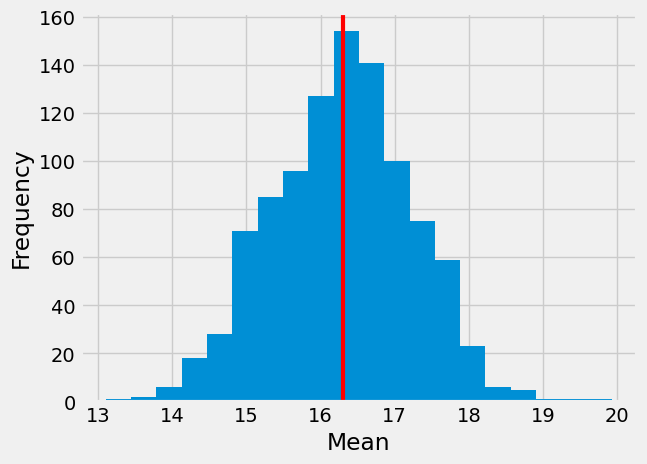

In [13]:
random.seed(0)
population= getHighs() #gets all the highs from csv file
sampleSize = 100
numSamples = 1000 #1k samples w/size of 100
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean , sampleMean, popSD, sampleSD =\
        getMeansAndSds(population, sample, verbose=False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =', round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =',round(np.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Sample', 'Mean', 'Frequency') #hsould expect a bell shape if sample size is big enough
plt.axvline(x = popMean, color = 'r', linewidth = 3.0)
plt.show



Getting a Tighter Bound¶
Will drawing more samples help?

Try increasing from 1000 to 2000 in the above code
Standard deviation goes from 0.943 to 0.946
Doesn't help!
How about larger samples?

Try increasing sample size from 100 to 200
Standard deviation goes from 0.943 to 0.662 (You may have different result but will be similar.)
This helps!

Mean of sample Means = 16.282
Standard deviation of sample means = 0.946


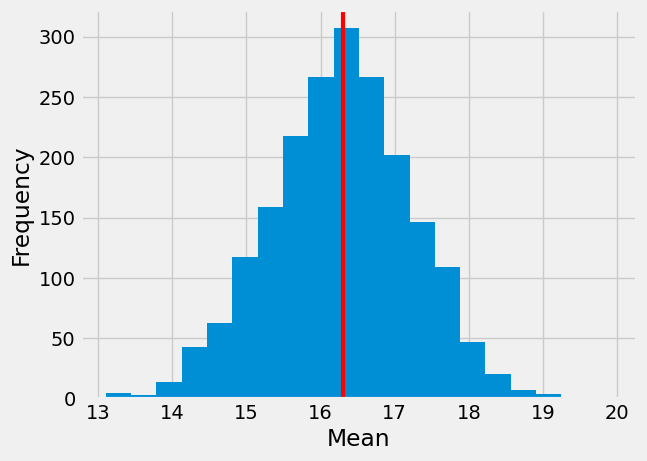

In [18]:
random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 2000 # from 1000 to 2000
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSds(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =', round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =', round(np.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
plt.axvline(x = popMean, color = 'r', linewidth=3.0)
plt.show()

Mean of sample Means = 16.282
Standard deviation of sample means = 0.662


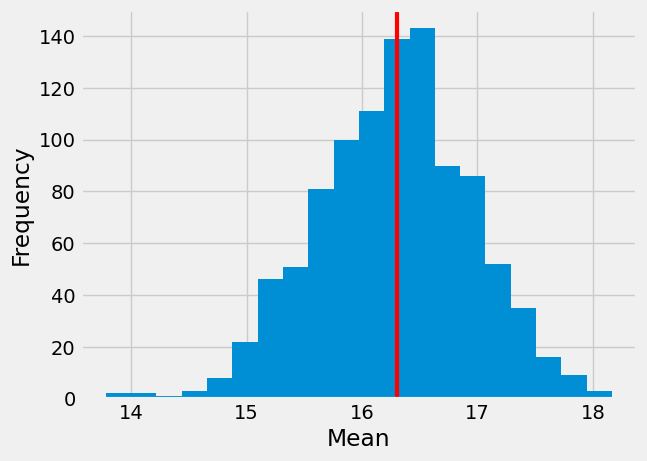

In [19]:
random.seed(0) 
population = getHighs()
sampleSize = 200 # from 100 to 200
numSamples = 1000 
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSds(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =', round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =', round(np.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
plt.axvline(x = popMean, color = 'r', linewidth=3.0)
plt.show()

Mean of sample Means = 16.31
Standard deviation of sample means = 0.675


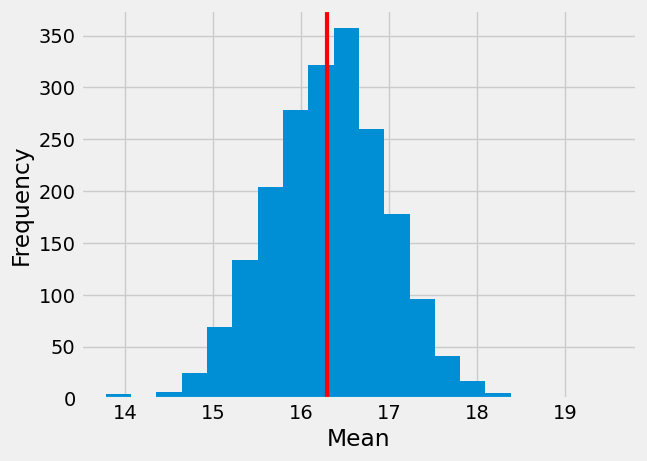

In [20]:
random.seed(0) 
population = getHighs()
sampleSize = 200 # from 100 to 200
numSamples = 2000 
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSds(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =', round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =', round(np.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
plt.axvline(x = popMean, color = 'r', linewidth=3.0)
plt.show()

Mean of sample Means = 16.298
Standard deviation of sample means = 0.298


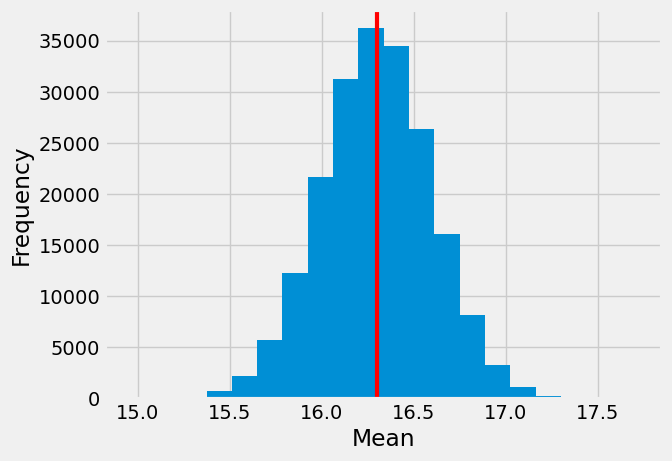

In [23]:
random.seed(0) 
population = getHighs()
sampleSize = 1000 # from 100 to 200
numSamples = 200000 
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSds(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =', round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =', round(np.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
plt.axvline(x = popMean, color = 'r', linewidth=3.0)
plt.show()

## Error Bars
Graphical representation of the variability of data
Way to visualize uncertainty
When intervals don't overlap, we can conclude that means are statistically significantly different at 95% level

In [19]:
def showErrorBars(population, sizes, numTrials): #numTrials(how many Trials/samples)
    xVals = [x for x in sizes] #sample size values
    sizeMeans, sizeSDs = [], []
    for sampleSize in sizes: 
        #xVals.append(sampleSize)
        trialMeans = []
        for t in range(numTrials): # iteration is used to draw a sample and based on sample size
            sample = random.sample(population, sampleSize)
            popMean, sampleMean, popSD, sampleSD =\
                getMeansAndSds(population, sample) #this line can be more efficiant since pop mean wont change
            trialMeans.append(sampleMean)
        sizeMeans.append(np.mean(trialMeans))
        sizeSDs.append(np.std(trialMeans))
    print(sizeSDs)
    #plot
    """sizeMeans == X value is sample sizes, y value is the mean of each sample means
    i.e if 10 sample sizes, we have 10 xvalues and 10 y values
    each with means. its the mean of all sample means"""
    plt.errorbar(xVals, sizeMeans,
                 yerr = 1.96*np.array(sizeSDs), fmt = 'o',
                 label = '95% confidence')
    plt.title('Mean temp (' + str(numTrials) + ' trials)')
    plt.xlabel('sample size')
    plt.ylabel('Mean')
    plt.axhline(y = popMean, color = 'r', label = 'Population Mean', linewidth = 3.0)
    plt.xlim(0, sizes[-1] + 10)
    plt.legend()
    plt.show
    





[1.3187873740296425, 1.0053313241911843, 0.7064000708875956, 0.5175415224646233, 0.46485751939942593, 0.44740799259289066, 0.4023573287134763, 0.35799961367269084]


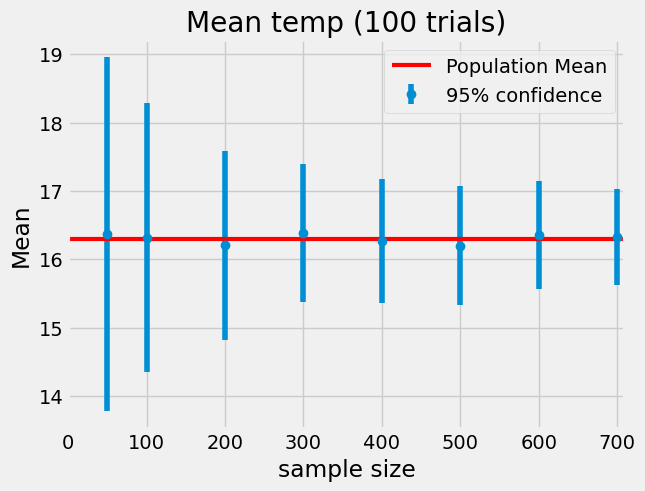

In [21]:
random.seed(0)
population = getHighs()
showErrorBars(population, (50, 100, 200, 300, 400, 500, 600, 700), 100)

# check the variance of sample and standard error of the mean 
3 of central limit theorem: The variance of the sample means will be close to the variance of the population divided by the sample size
*Compute the standard error of the mean (SEM or SE)

SE=σ/√n
 
where  σ
  is the standard deviation of the population and  n
  is the size of the sample. Below is the code to compute SE.

In [22]:
def sem(popSD, sampleSize): #sem == standard error of the mean
    return popSD/sampleSize**0.5

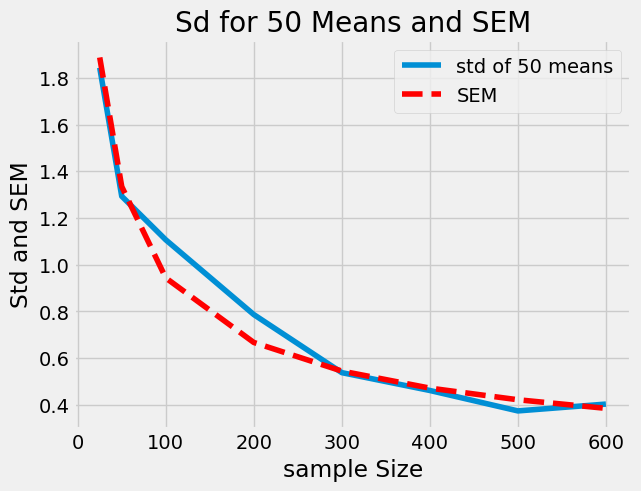

In [31]:
sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50 
population = getHighs()
popSD = np.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(np.mean(sample))
    sampleSDs.append(np.std(means)) #varified if close to eachother
#plot
plt.plot(sampleSizes, sampleSDs, label = 'std of ' + str(numTrials) + ' means')
plt.plot(sampleSizes, sems, 'r--', label = 'SEM')
plt.xlabel('sample Size')
plt.ylabel('Std and SEM')
plt.title('Sd for ' + str(numTrials) + ' Means and SEM')
plt.legend()
plt.show()

In [34]:
# Sample SD vs. Population SD

def getDiffs(population, sampleSizes):
    popStd = np.std(population)
    diffsFracs = [] #differnces between sample deviation and population deviation
    for sampleSize in sampleSizes:
        diffs = []
        for t in range(100): # try each sample with same samplesize
            sample = random.sample(population, sampleSize)
            diffs.append(abs(popStd - np.std(sample))) #abs only positive. rid on negative
        diffMean = np.mean(diffs)
        diffsFracs.append(diffMean/popStd)
    return np.array(diffsFracs)*100 #*100 shows percentages instead of just floating point numbers
    
def plotDiffs(sampleSizes, diffs, title, label, color = 'b'):
    plt.plot(sampleSizes, diffs, label = label,
               color = color)
    plt.xlabel('Sample Size')
    plt.ylabel('% Difference in SD')
    plt.title(title)
    plt.legend()
    #plt.show()

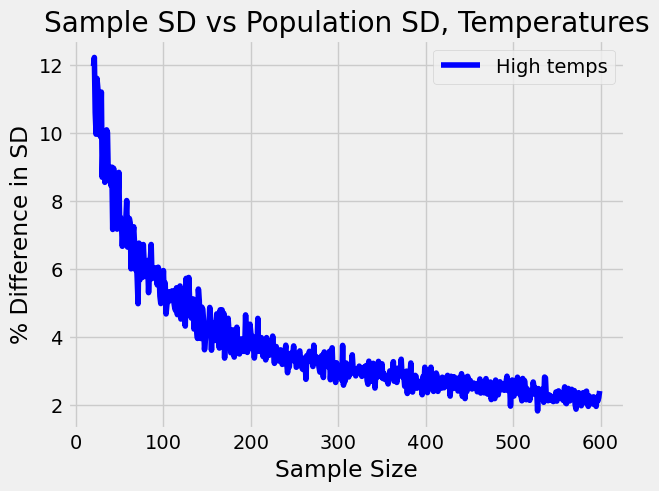

In [36]:
sampleSizes = range(20, 600, 1) #automates the sequence of sample sizes
diffs = getDiffs(getHighs(), sampleSizes)
plotDiffs(sampleSizes, diffs,
          'Sample SD vs Population SD, Temperatures',
          label = 'High temps')

In [37]:
# Looking at Distributions 
def plotDistributions(plots = 3):
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    if (plots == 3 or plots == 0):
        makeHist(uniform, 'Uniform', 'Value', 'Frequency')
        plt.figure()
    if (plots == 3 or plots == 1):
        makeHist(normal, 'Gaussian', 'Value', 'Frequency')
        plt.figure()
    if (plots == 3 or plots == 2):
        makeHist(exp, 'Exponential', 'Value', 'Frequency')
    plt.show()

Lines 5 to 7 use random.random() to generate values from the “continuous uniform” distribution over the interval [0.0, 1.0).

use random.gauss(0, 1) to draw samples from the normal distribution that has mean 0 and standard deviation 1.

Use random.expovariate(0.5) gives you random floating point numbers, exponentially distributed. Note that 0.5 is lambda which has to do with how quickly the exponential decays or goes up, depending on the direction. (For this case, it decays.)

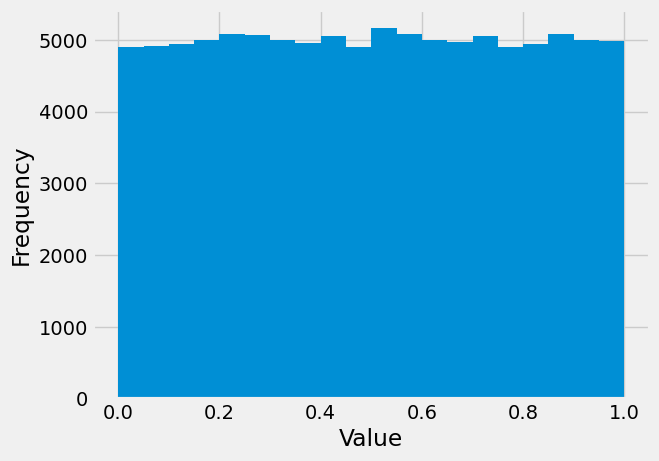

<Figure size 640x480 with 0 Axes>

In [38]:
plotDistributions(0)

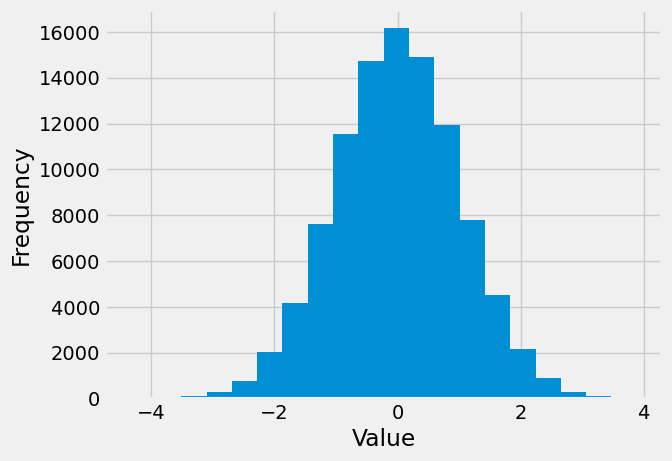

<Figure size 640x480 with 0 Axes>

In [39]:
plotDistributions(1)

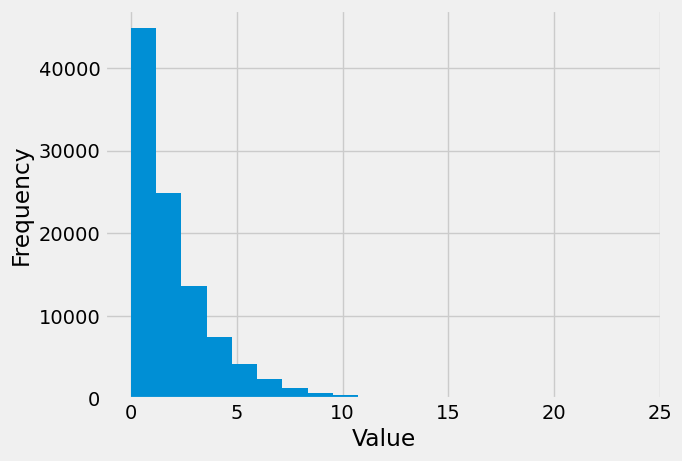

In [40]:
plotDistributions(2)

Now based on the three distributions, let us run the below code to see if there exists difference between sample SD and population SD.

In [44]:
# Does Distribution Matter?
# Skew, a measure of the asymmetry of a probability distribution, matters 
def compareDists(plots = 3):
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    if (plots == 3 or plots ==0):
        plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population', 'm')
    if (plots == 3 or plots ==1):
        plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population', 'b')
    if (plots == 3 or plots ==2):
        plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population', 'r')

#compareDists()  

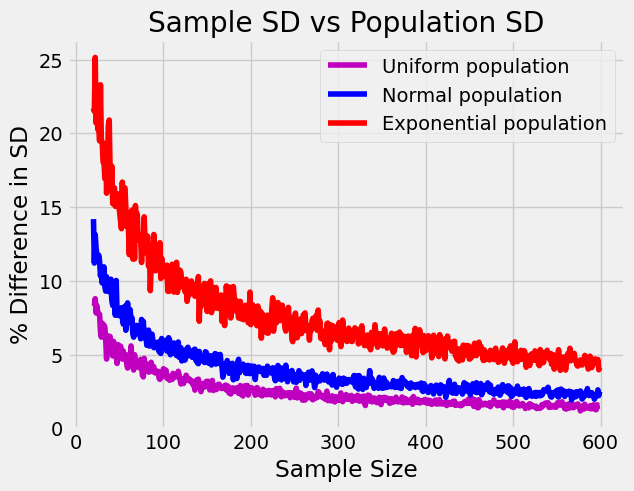

In [45]:
compareDists(3)

#### The more skew you have in distribution, the more samples you need.
can use SiPi library for skew stats

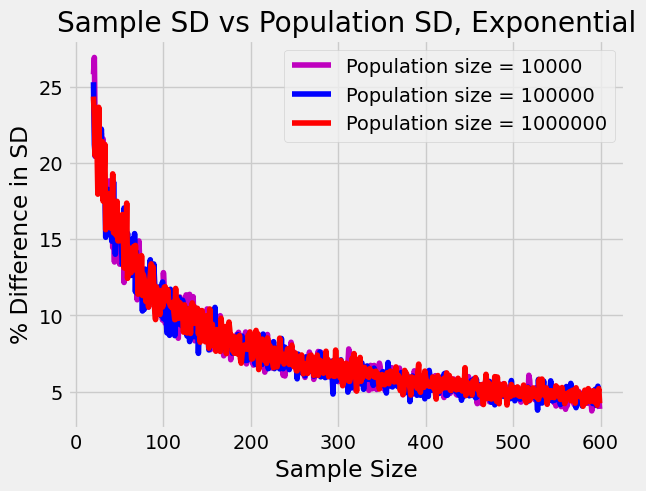

In [46]:
# Does population size matter?

popSizes = (10000, 100000, 1000000)
colors = ['m', 'b', 'r']
sampleSizes = range(20, 600, 1)
for i in range(len(popSizes)):
    size = popSizes[i]
    color = colors[i]
    population = []
    for i in range(size):
        population.append(random.expovariate(0.5))
    ediffs = getDiffs(population, sampleSizes)
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD, Exponential',
              'Population size = ' + str(size), color)
    
#samples are all overlaping, indicating that there isn't a difference 
#for the population size; population size doesn't matter

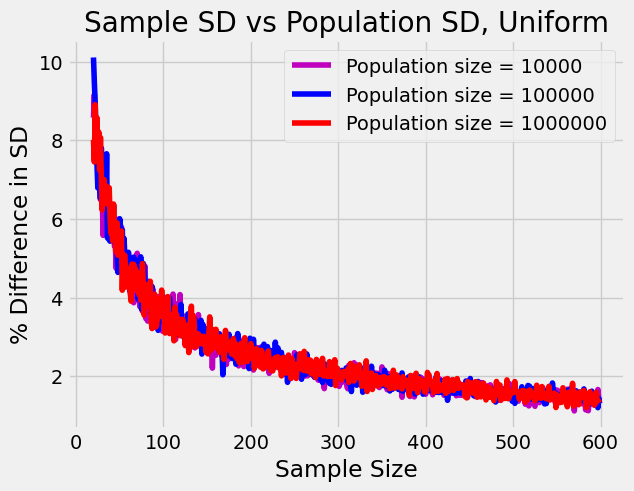

In [61]:
# Does population size matter?

popSizes = (10000, 100000, 1000000)
colors = ['m', 'b', 'r']
sampleSizes = range(20, 600, 1)
for i in range(len(popSizes)):
    size = popSizes[i]
    color = colors[i]
    population = []
    for i in range(size):
        population.append(random.random())
    ediffs = getDiffs(population, sampleSizes)
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD, Uniform',
              'Population size = ' + str(size), color)

To Estimate Mean from a Single Sample
1. Choose sample size based on estimate of skew in population; if large skew, need larger sample

1. Choose a random sample from the population

1. Compute the mean and standard deviation of that sample

1. Use the standard deviation of that sample to estimate the SE. (Only estimated SE!)

1. Use the estimated SE to generate confidence intervals around the sample mean

*Works great when we choose independent random samples

*Not always so easy to do, as political pollsters keep learning

Let us go back to our temperature example


In [60]:
# Are 200 examples enough?
temps = getHighs()
popMean = sum(temps)/len(temps)
sampleSize = 200
numTrials = 10000

random.seed(0)      
numBad = 0
for t in range(numTrials):
    sample = random.sample(temps, sampleSize)
    sampleMean = sum(sample)/sampleSize
    se = np.std(sample)/sampleSize**0.5  #estimated Standard Error,
    if abs(popMean - sampleMean) > 1.96*se: # if greater, than the estimation is bad
        numBad += 1
print('Fraction outside 95% confidence interval =',
      numBad/numTrials)

#The result shows that 200 examples indeed are enough here. 
#If all sample means were all in the 95% confidence interval, 
#the result is too good and we messed up. But the result is almost 5%, 
#showing the sample size does work!

Fraction outside 95% confidence interval = 0.0511
